<a href="https://colab.research.google.com/github/stemgene/The-analysis-of-drop-in-engagement/blob/main/The_analysis_of_drop_in_engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Summary and Actionable Insights

#### Background

I am a Yammer analyst trained to consider the value of each project. Value is measured as the maximum return on my time investment. 

#### The problem

There is an unexpected downturn in Yammer's user engagement in the month of August, 2014. I have been tasked with identifying the cause of the drop in engagement and must recommend a time-efficient solution.

#### Recommended Actions

There are two potential problems that may or may not be related. 

_1) There is a hold-up in the account activation process likely due to the transition to Yammer Enterprise._ 

_2) User Type 1 is specifically affected by this drop, but I have no information on the definition of the user type classification criterion._ 

I would consult with my team for further information on user type to determine if this is a causative or correlative relationship. 

There was no corresponding spike in re-engagement emails with the engagement drop. I would consult with my team to confirm when a drop is significant (criteria for alarm). If the drop falls within the criteria for "alarm" I would recommend the threshold for preventative be lowered for correction of future drops.

----------

## Hypotheses and Testing Strategies

1. **Technical error**. Was a server or database down? Was there a bad update in the production code? Was there A|B testing in progress that interfered with UX/UI?
    - To test this, I will look for a change in the type of user events with particular interest in homepage landings, email activity, logins, and likes. 
    - I will look for different patterns of use between user types (which remain undefined in the instructions) 
    - I will look for patterns of use by device type. For example, if there is a bug with a Windows update that prevented Windows users, but not MacOS users from logging in or otherwise engaging with the platform
    
    
2. **Social consequences**. Did the CEO post something inflammatory on Twitter? Was there popular unrest or pandemic? Was it a holiday?
    - I did a Google search for events related to Yammer to see if it was in the news, but found nothing significant 
    - Sept 2, 2014 was the day after labor day in the US but the drop happened prior to the holiday
    
    
3. **Business consequences** - Is this a part of a larger business cycle? Was there a corresponding drop in the stock market? Did a competitor increase competition with a new product or feature? Was there a change to user policy? 
    - **In July 2014, Yammer made the migration to Sharepoint with Yammer Enterprise as part of the MS Office enterprise suite. A user had to take extra steps to activate their yammer enterprise accounts.**
        - "Before you can activate Yammer Enterprise, you need to choose Yammer tool for Sharepoint Online by going to Office 365 Admin Centre, Sharepoint -> Settings. On the settings page, change the Enterprise Social Collaboration tool to Yammer.com service."
        - There's an additional step and activation hurdle if you already have an office365 personal account.
        - If this is an impactful hurdle for Yammer usage, it will affect Yammer users who have to transition from personal accounts to enterprise accounts due to an activation step. There will be hurdles in the activation process with a large number of pending activations. All devices are likely to be affected proprtionate to their average uses, as are engagemnt frequency and types.
    - July 24, 2014 a co-founder, David Sacks announced his resignation, but it isn't likely that the typical user would know this or let it impact their yammer activity.
    - There were no large turns in the stockmarket.
    - I found no significant events in searches related to yammer's competitors having an advantage over yammer.
    - I found no mention of changes to user policy after Feb 2014, but this would be something to check for internally

## Dependencies and defaults

#### Import packages

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import datetime as dt
from statsmodels.tsa.stattools import adfuller

#### Define default values

In [ ]:
d_home = os.path.join('~',"Docs","insight","data_challenges")
d_data = os.path.join(d_home,'data')

#### Custom Functions

In [ ]:
def format_axes (fig, ax, y_label):
    ax.axhline(avg, color = 'dimgray', ls = '-', alpha = 0.5, label = 'mean')
    ax.axhline(avg - sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '-1 std')
    ax.axhline(avg + sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '+1 std')
    ax.axhline(avg - sd*2, color = 'dimgray', ls = 'dashed', alpha = 0.5, label = '-2 std')
    ax.axhline(avg + sd*2, color = 'dimgray', ls = 'dashed', alpha = 0.5, label = '+2 std')
    handles, labels = ax.get_legend_handles_labels()
    ax.tick_params(labelsize = 16)
    ax.set_xlabel('\n Time (weeks)', fontsize = 20)
    ax.set_ylabel(y_label, fontsize = 20)
    ax.legend(handles,labels, loc='center left', fontsize = 14, bbox_to_anchor=(1, 0.5))
    ax.set_facecolor ('ghostwhite')
    
def get_dftest (X):
    results = adfuller(X)
    display(HTML('ADF Statistic: ' + str(round(results[0],3))))
    display(HTML('p-value: ' + str(round(results[1],3))))
    display(HTML('Critical Values:'))
    for key, value in results[4].items():
        display(HTML(str(key) + ' '+ str(round(value,3))))

## Is there a problem in the account creation and activation process?

In [ ]:
df = pd.read_csv(os.path.join(d_data, 'yammer_users.csv'))
dfu = df.copy()
dfu.user_id = dfu.user_id.astype(int)
dfu = dfu.set_index('user_id')
#dfu.info()
display(HTML(dfu.head().to_html()))

,created_at,company_id,language,activated_at,state
user_id,,,,,
0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2013-01-01 10:59:05,51.0,english,NaN,pending
3,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


#### Remove duplicates

In [ ]:
dfu = dfu.drop_duplicates()

#### Get missing

In [ ]:
display(HTML("Number of missing create dates: " +  
             str(len(np.where(dfu.created_at.isnull())[0])) +
            "<br>Number of missing activate dates: " +  
             str(len(np.where(dfu.activated_at.isnull())[0]))))

### _Problem: Half of the created accounts have not been activated._

_50.7 % of the users are missing activation dates. Is this an error or has the transition to Sharepoint caused a halt in activations? To answer this, I wanted to see if there was a time-dependent effect of the average time from account creation to account activation. If the time between creation and activation increased between July and August, it would support my hypothesis._  

#### Convert the time to a timestamp column

In [ ]:
dfu.created_at = pd.to_datetime(dfu.created_at, format = "%Y-%m-%d %H:%M:%S", errors = 'ignore')
dfu.activated_at = pd.to_datetime(dfu.activated_at, format = "%Y-%m-%d %H:%M:%S", errors = 'ignore')
#dfu.info()

In [ ]:
dfu.sort_values('created_at', ascending = False).head()

,created_at,company_id,language,activated_at,state
user_id,,,,,
19057,2014-08-31 20:40:32,7872.0,indian,NaT,pending
19055,2014-08-31 20:21:14,9073.0,french,2014-08-31 20:22:54,active
19059,2014-08-31 19:51:59,6817.0,indian,2014-08-31 19:53:43,active
19058,2014-08-31 19:48:45,12624.0,english,NaT,pending
19065,2014-08-31 19:29:19,8352.0,italian,NaT,pending


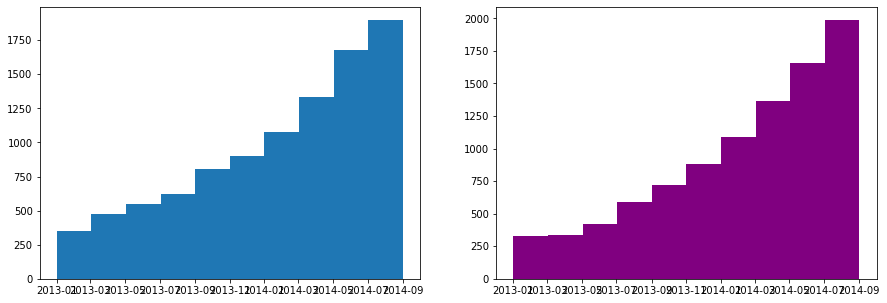

In [ ]:
fig2, ax = plt.subplots(1,2, figsize = (15,5))
a3 = ax[0].hist(dfu[dfu.state == 'pending'].created_at)
a4 = ax[1].hist(dfu[dfu.state == 'active'].created_at, color = 'purple')

#### Could a user activate their account after 7-25-14?

In [ ]:
display(HTML('<br>Most recent activation: ' + str(max(dfu.activated_at))))

#### Is there a difference in the time of activation relative to creation in August 2014 compared to earlier months? 

In [ ]:
dfu['time_to_activation'] =(dfu.activated_at-dfu.created_at).dt.seconds

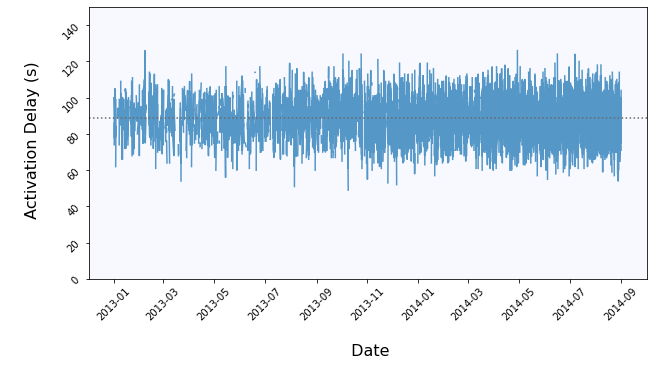

In [ ]:
fig1, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(dfu.created_at, dfu.time_to_activation, alpha = 0.75)
ax.spines['bottom'].set_visible(True)
ax.set_ylim(0,150)
ax.axhline(np.mean(dfu.time_to_activation), color = 'dimgray', ls = ':')
ax.set_xlabel ('\n Date', fontsize = 16)
ax.set_ylabel ('\n Activation Delay (s)\n', fontsize = 16)
ax.set_facecolor('ghostwhite')
ax.tick_params(axis = 'both', which = 'major', labelrotation = 45)

### _Problem: Time to activation is ~50-130 seconds or not at all._
_This is not what I expected. The time between account creation and activation for non-null dates is between 50-100 _seconds. I was expecting minutes to weeks._ 

_A common sense explanation for the incredibly rapid activation times in the above plot vs. the accounts that are not getting activated is the difference in signup type. For example a company may create accounts for all of its users but to complete the process, the user has to log in and manually complete the activation step. On the other hand, a user who signs themself up is likely to have only the difference in the time it takes for the signup form to process then check their email for the activation link, enter a texted verification code, etc._ 

_Based on this data alone, I would hypothesize that there is an activation barrier for users who are signed up by their employer that is not affecting self-signups._

_To be sure I have not made a mistake in encoding the datetimes, I used test functions (not shown) to:_

_1. Double check that my datetime conversions are correct._

_2. Double check that my timedelta units are correct._ 

_To test this hypothesis, I need to know which users created their own accounts and which users signed up themselves._

## Are the pending accounts actually pending or are they mislabeled due to a system error?

#### Import the events dataset

In [ ]:
dfv = pd.read_csv('data/yammer_events.csv')
#dfv.info()
dfv.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


#### Set occurred_at as datetime and ID to int

In [ ]:
dfv.occurred_at = pd.to_datetime(dfv.occurred_at, format = "%Y-%m-%d %H:%M:%S", 
                  errors = 'ignore')
dfv.user_id = dfv.user_id.astype(int)
#dfv.info()
#dfv.head()

#### Find the range of time for evaluation period

In [ ]:
year_range = dfv.occurred_at.max() - dfv.occurred_at.min()
display(HTML('<br>Time period covered: '+ str(year_range)))

#### Did any of the pending users engage with the plaform?

In [ ]:
active_users = np.unique(dfv.user_id)
pending_users = dfu[dfu.state =='pending'].index
unique_engaged = [u for u in dfu.index.values if u not in active_users]
unique_activated = [u for u in active_users if u not in dfu.index.values ]
unique_pending = [u for u in pending_users if u in active_users]

display(HTML('<br> Number of activated accounts without activity: '+  
             str(len(unique_engaged)) + '<br>' + 
             'Number of active accounts without activation: ' +  
             str(len(unique_activated)) + '<br>' +  
            'Number of pending accounts with activity:' + 
             str(len(unique_pending))))

#### Were pending actively engaging or were they caught in the signup flow?

In [ ]:
pending_in_signup = [u for u in unique_pending if u in \
       dfv[dfv.event_type == 'signup_flow'].user_id.values]
pending_engaged = [u for u in unique_pending if u in \
       dfv[dfv.event_type == 'engagment'].user_id.values]
display(HTML('<br>Pending users caught in signup_flow : ' + 
             str(len(pending_in_signup)) + '<br>' +
            'Pending users actively engaging on the platform: '
             + str(len(pending_engaged))))

## Is there a relationship between the time a user was activated and their engagement frequency?

In [ ]:
# Find the most recent engagment for each user ID
dfg = dfv.groupby(['user_id','event_type']).max().reset_index()
#dfg.head()

In [ ]:
# Get engagement counts 
dfc = dfv.groupby(['user_id','event_type']).count().reset_index()
#dfc.head()

In [ ]:
# Merge the user table and the events table on user_id
tmp = dfu.loc[dfg.user_id][:].reset_index()
dfg = dfg.merge(tmp, how = 'left', on = 'user_id')

dfg.head()

,user_id,event_type,occurred_at,event_name,location,device,user_type,created_at,company_id,language,activated_at,state,time_to_activation
0,4,engagement,2014-07-07 07:49:15,view_inbox,India,samsung galaxy s4,3.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,74.0
1,8,engagement,2014-07-30 06:10:09,view_inbox,France,macbook pro,3.0,2013-01-01 04:38:30,2698.0,french,2013-01-01 04:40:10,active,100.0
2,11,engagement,2014-08-06 13:12:14,view_inbox,United States,iphone 4s,1.0,2013-01-01 08:07:45,3745.0,english,2013-01-01 08:09:17,active,92.0
3,17,engagement,2014-08-12 11:04:37,view_inbox,Japan,macbook pro,1.0,2013-01-02 10:56:15,5025.0,japanese,2013-01-02 10:57:58,active,103.0
4,19,engagement,2014-07-01 06:50:56,view_inbox,Nigeria,nexus 7,1.0,2013-01-02 09:54:01,326.0,english,2013-01-02 09:55:34,active,93.0


In [ ]:
# Make activated_at a datetime column if not already
dfg.activated_at = pd.to_datetime(dfg.activated_at, 
                    format = "%Y-%m-%d %H:%M:%S", 
                  errors = 'ignore')

In [ ]:
# Make the new "time_since_activation" column
dfg['time_since_activation'] = (dfg.occurred_at - dfg.activated_at).dt.days

#### Remove any users with pending accounts

In [ ]:
dfg = dfg[dfg.event_type == 'engagement']
#dfg.head()
#display(HTML(dfg.head().to_html()))

## Are accounts that have been made in recent weeks less active than those activated before July?

If so, I would expect the newer accounts to be less active in August than the older accounts (i.e. the concentration of points in the scatter plot would be thinner in the lower righthand quadrant).

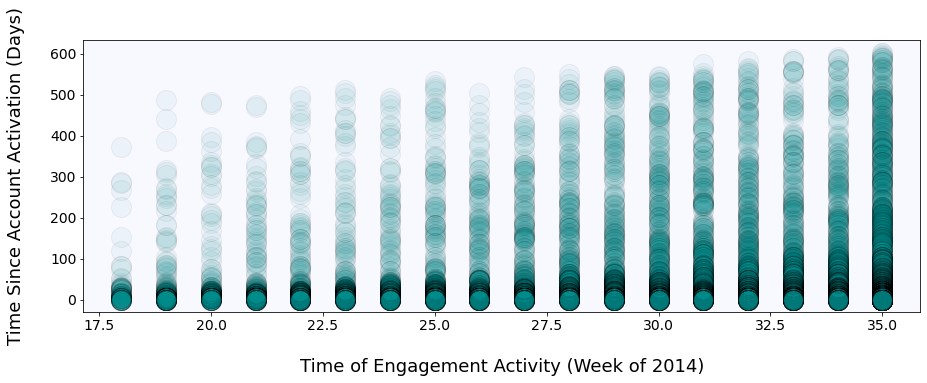

In [ ]:
dfg2 = dfg.groupby('user_id').count()
fig5, ax = plt.subplots(1,1, figsize =(15,5))
ax.plot(dfg.occurred_at.dt.week, dfg.time_since_activation, 
        ls = 'none', marker = 'o', alpha = 0.05, ms = 20,
        color = 'darkcyan', mec = 'k')
ax.set_xlabel ('\nTime of Engagement Activity (Week of 2014)',
              fontsize = 18)
ax.set_ylabel ('Time Since Account Activation (Days)\n',
              fontsize = 18)
ax.set_facecolor ('ghostwhite')
ax.tick_params (labelsize = 14)

_I see no thinning in the lower righthand quadrant to support my hypothesis that newly created accounts are less active than long-standing accounts. If anything, they appear to be more active than older accounts across the entire sampling period._

### Did the number of engagements per user change recently?

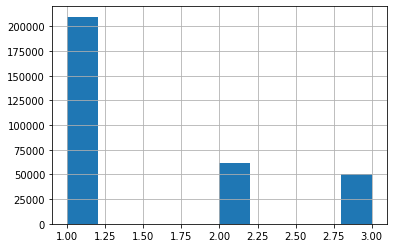

In [ ]:
dfv[dfv.event_type == 'engagement'].user_type.hist()
#display(HTML('User types: '+ str(np.unique(dfv.user_type)))) # has nan values
#display(HTML('Event types: '+ str(np.unique(dfv.event_type))))
#display(HTML('Event names: '+ str(np.unique(dfv.event_name))))
#display(HTML('Locations: '+ str(np.unique(dfv.location))))
#display(HTML('Devices: '+ str(np.unique(dfv.device))))

#### Get number of engagments per user

In [ ]:
dft = dfv[dfv.event_type == 'engagement'].groupby(['user_id', dfv['occurred_at'].dt.week]).count()
dft = dft.drop('occurred_at', axis = 1).reset_index()
#dft.head()

#### Get total number of events for each week

In [ ]:
df_total = dft.groupby('occurred_at').count()
df_total = df_total.reset_index()
df_total.head()

,occurred_at,user_id,event_type,event_name,location,device,user_type
0,18,701,701,701,701,701,701
1,19,1054,1054,1054,1054,1054,1054
2,20,1094,1094,1094,1094,1094,1094
3,21,1147,1147,1147,1147,1147,1147
4,22,1113,1113,1113,1113,1113,1113


## How is overall user engagement changing over time? 

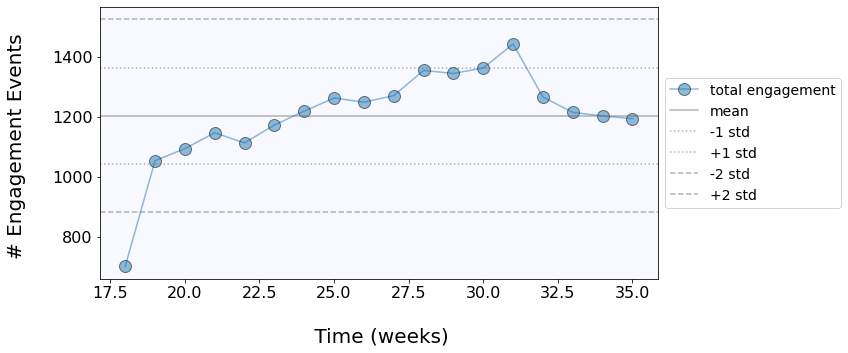

In [ ]:
fig6, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(df_total.occurred_at, df_total.event_type, marker = 'o', ms = 12, 
        alpha = .5, label = 'total engagement', mec = 'black')
avg = df_total.user_id.mean()
sd = df_total.user_id.std()
format_axes(fig6, ax, '# Engagement Events \n')

#### Dickey-Fuller test to see if the time series is stationary

In [ ]:
get_dftest(df_total.user_id)

#### Define a function to de-trend the data using the subtraction method.

In [ ]:
def subtract_baseline(df, col):
    df['subtracted']= np.nan
    i = 0
    for index,row in df.iterrows():
        if i > 0:
            df.at[index,'subtracted'] = row[col] - last_row
        last_row = row[col]
        i += 1
    return df

#### Subtract the baseline from the timeseries

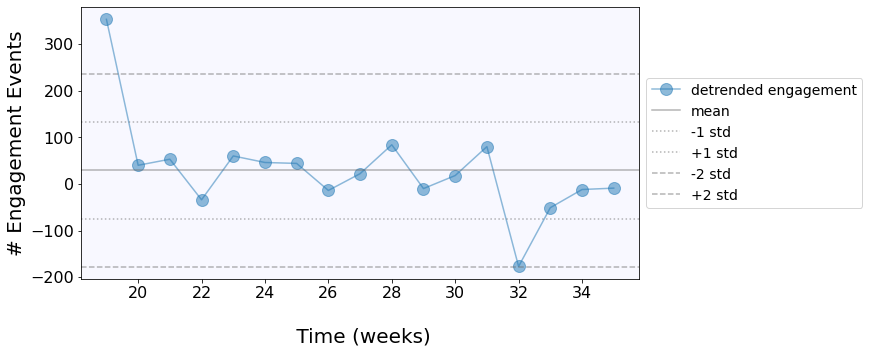

In [ ]:
df_total = subtract_baseline(df_total, 'event_type')
df_total2 = df_total.copy()
fig7, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(df_total.occurred_at, df_total.subtracted, marker = 'o', ms = 12,
        alpha = .5, label = 'detrended engagement')
avg = df_total.subtracted.mean()
sd = df_total.subtracted.std()
format_axes(fig7, ax, '# Engagement Events')

#### Dickey-Fuller test on Subtracted data to confirm stationary

In [ ]:
get_dftest(df_total.subtracted[1:]) # first datapoint is NaN

#### Look for autocorrelation on original data

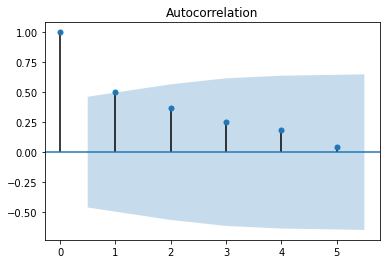

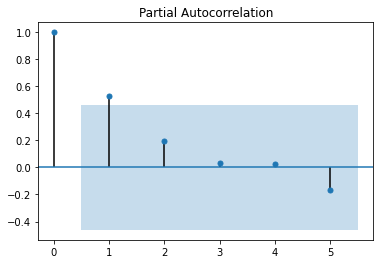

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
a1 = plot_acf(df_total.event_type, lags=5)
a2 = plot_pacf(df_total.event_type, lags=5)

#### Look for autocorrelation in de-trended data

In [ ]:
#a1 = plot_acf(df_total.subtracted, lags=5)
#a2 = plot_pacf(df_total.subtracted, lags=5)

_In the original data, all but one value is within the 95% confidence interval (blue shading), so there's no autocorrelation (or hidden periodicity), at least for the range of time we are given. An additional check (not shown) ensured that the de-trended timeseries was stationary and lacked autocorrelation, as well._

## Is the drop in engagement specific to the name of the engagement event?

#### What are the most frequent engagement types?

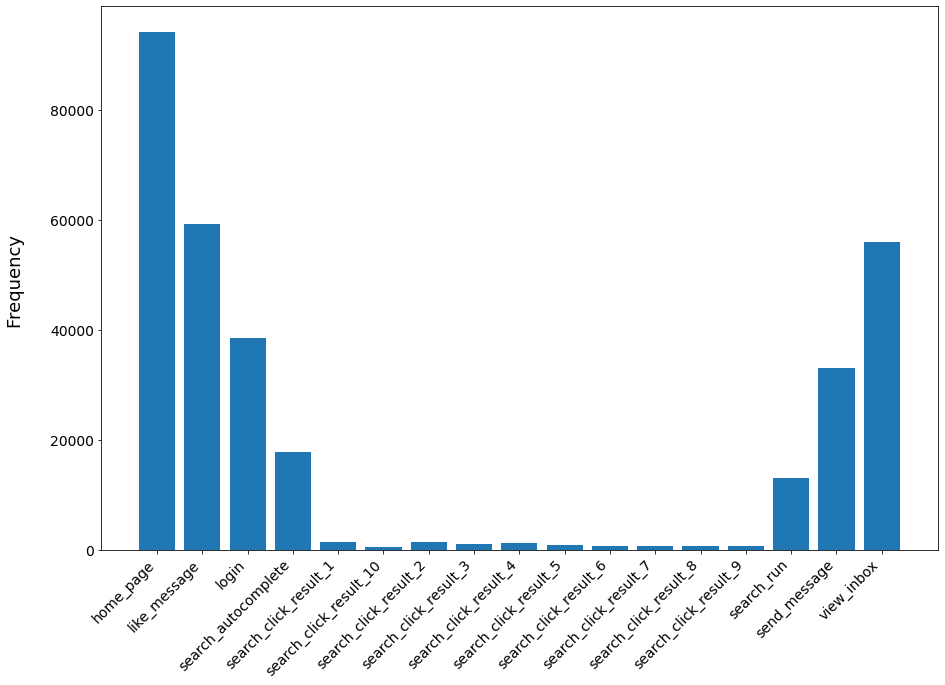

In [ ]:
df_event_name = dfv[dfv.event_type == 'engagement'].groupby('event_name').count()
df_event_name = df_event_name.reset_index()
fig6, ax = plt.subplots(1,1, figsize = (15,10))
a6 = ax.bar(df_event_name.event_name, height = df_event_name.user_id)
a6 = ax.set_xticklabels(df_event_name.event_name, 
            ha = 'right',rotation = 45,)
ax6 = ax.tick_params(labelsize = 14)
ax6 = ax.set_ylabel('Frequency \n', fontsize = 18)

_For a quick analysis, I'm going to look for a change in the frequency of these events over time as a first pass. From there, I can decide whether I need to do feature importance or if there is a 'bloody obvious' answer for what caused the drop in engagement. I'm keeping in mind the company policy of efficiency and triage._

#### Aggregate total engagements by event type and de-trend the time series with a "subtracted" column

In [ ]:
df_en = dfv[dfv.event_type == 'engagement'].groupby(['event_name', dfv['occurred_at'].dt.week]).count()
df_en = df_en.drop('occurred_at', axis = 1).reset_index()
df_en = subtract_baseline(df_en, 'user_id')
#df_en.head()

#### Plot engagements per engagement name by time in weeks for events with more than 500 records

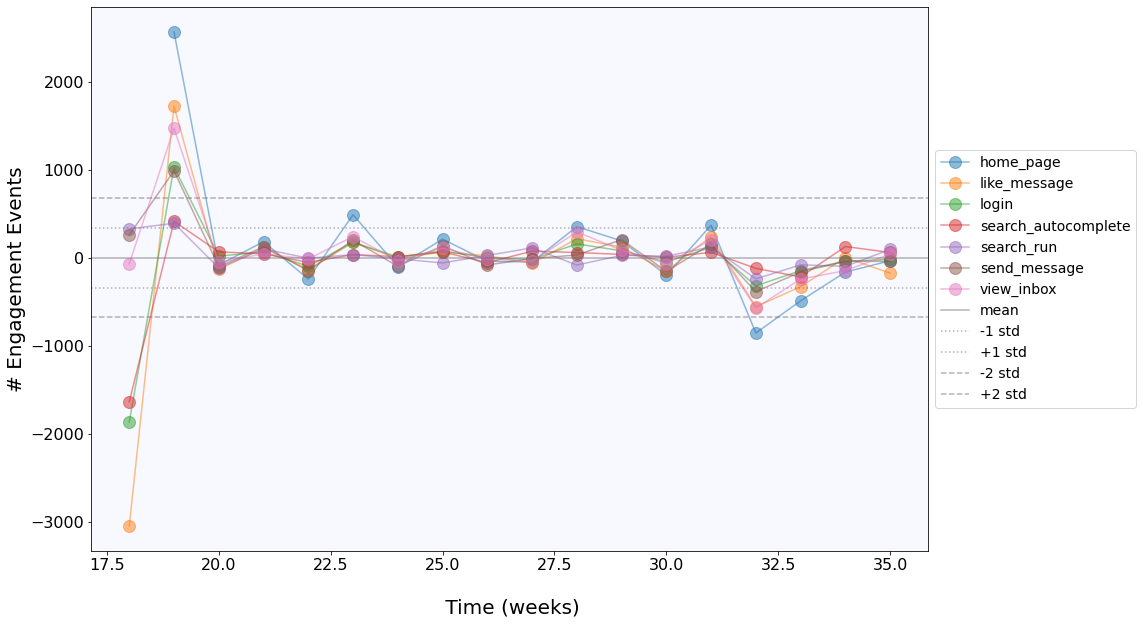

In [ ]:
fig6, ax = plt.subplots(1,1, figsize = (15,10))
for e in np.unique(df_en.event_name):
    if max(df_en[df_en.event_name == e].event_type) > 500:
        ax.plot(df_en[df_en.event_name == e].occurred_at, 
            df_en[df_en.event_name == e].subtracted, marker = 'o', ms = 12, 
            alpha = .5, label = e)
avg = df_en.subtracted.mean()
sd = df_en.subtracted.std()
format_axes(fig6, ax, '# Engagement Events')

### _Problem: Homepage landings are the most affected engagement type._ 
_Homepage landings are most affected in the drop, falling below 2 standard deviations of the de-trended overall mean. View_inbox and like_message fell just shy of the 2 standard deviation cutoff. Logins, create_user, searches, and send_messages were all within the noise. Because view_inbox and like_message would necessitate logging in to the system and interacting with the Yammer UI, it is not surprising that they would show a similar drop in engagement alongside the homepage. However, if there is a function to reply directly to messages from the user's email account without having to log into the Yammer system, that could account for send_message being relatively unaffected. It is unclear whether a search has to be performed exclusively through the homepage, so I cannot draw conclusions about search activity from this data._

## Is the decrease in engagement region-specific?

#### Get the overall frequency distribution of locations

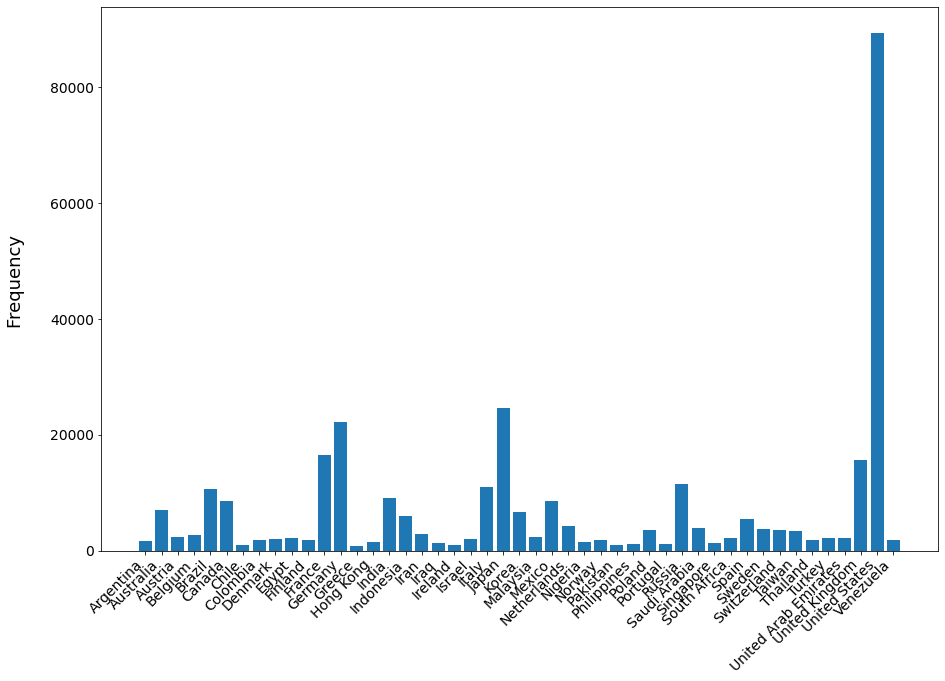

In [ ]:
df_location = dfv[dfv.event_type == 'engagement'].groupby('location').count()
df_location = df_location.reset_index()
fig6, ax = plt.subplots(1,1, figsize = (15,10))
a6 = ax.bar(df_location.location, height = df_location.user_id)
a6 = ax.set_xticklabels(df_location.location, 
            ha = 'right',rotation = 45,)
ax6 = ax.tick_params(labelsize = 14)
ax6 = ax.set_ylabel('Frequency \n', fontsize = 18)

In [ ]:
df_loc = dfv[dfv.event_type == 'engagement'].groupby(['location', dfv['occurred_at'].dt.week]).count()
df_loc = df_loc.drop('occurred_at', axis = 1).reset_index()
#df_loc.head()

#### Plot engagement over time for each location with more than 500 records

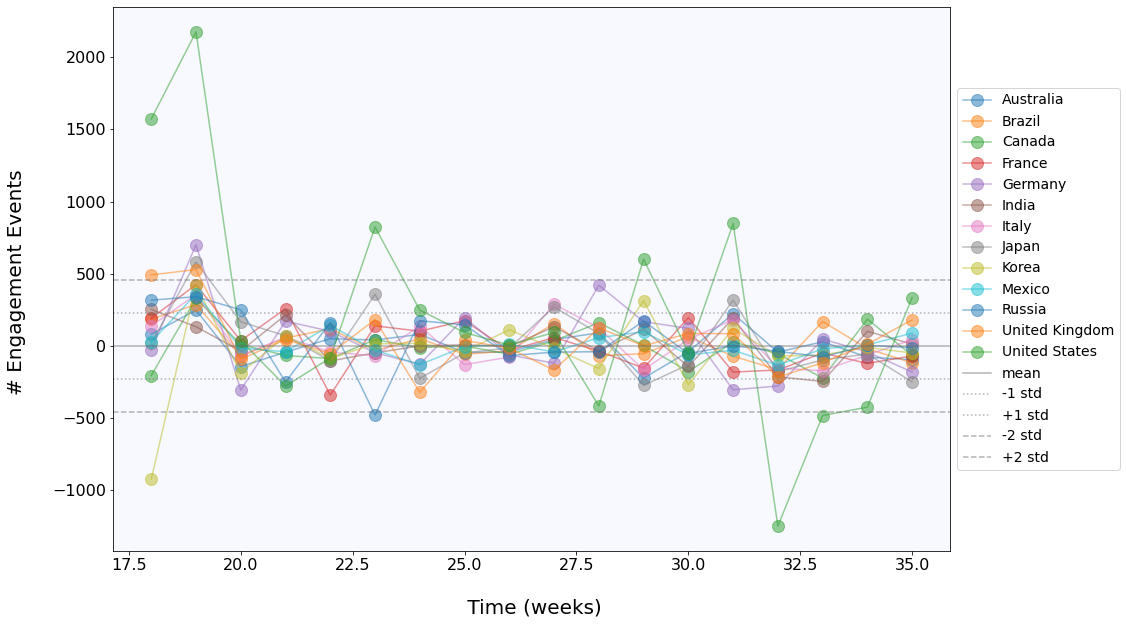

In [ ]:
df_loc = subtract_baseline(df_loc, 'user_id') 
fig7, ax = plt.subplots(1,1, figsize = (15,10))
for l in np.unique(df_loc.location):
    if max(df_loc[df_loc.location == l].event_type) > 500:
        ax.plot(df_loc[df_loc.location == l].occurred_at, 
            df_loc[df_loc.location == l].subtracted, marker = 'o', ms = 12, 
            alpha = .5, label = l)
avg = df_loc.subtracted.mean()
sd = df_loc.subtracted.std()
format_axes(fig7, ax, '# Engagement Events \n')


### _Problem: The US is more sensitive to the drop than other countries._ 
_However, the dataset is massively imbalanced with 5X more users than the next highest country (the UK). The other countries showed variation within the noise level during the same August 2014 time period. I will keep location in mind as a potential factor since it exceeded a 2 standard deviation drop from the overall mean, but with the imbalance as a caveat._

## Is device a factor driving the drop in engagement?

#### Get device frequency distribution

In [ ]:
df_device = dfv[dfv.event_type == 'engagement'].groupby('device').count()
df_device = df_device.reset_index()
#fig6, ax = plt.subplots(1,1, figsize = (15,10))
#a6 = ax.bar(df_device.device, height = df_device.user_id)
#a6 = ax.set_xticklabels(df_device.device, 
#            ha = 'right',rotation = 45,)
#ax6 = ax.tick_params(labelsize = 14)
#ax6 = ax.set_ylabel('Frequency \n', fontsize = 18)

In [ ]:
df_dev = dfv[dfv.event_type == 'engagement'].groupby(['device', dfv['occurred_at'].dt.week]).count()
df_dev = df_dev.drop('occurred_at', axis = 1).reset_index()
#df_device.head()

In [ ]:
df_dev = subtract_baseline(df_dev, 'user_id') 
#fig7, ax = plt.subplots(1,1, figsize = (15,10))
#for l in np.unique(df_dev.device):
#    if max(df_dev[df_dev.device == l].user_id) > 1000:
#        ax.plot(df_dev[df_dev.device == l].occurred_at, 
#            df_dev[df_dev.device == l].subtracted, marker = 'o', ms = 12, 
#            alpha = .5, label = l)
#avg = df_dev.subtracted.mean()
#sd = df_dev.subtracted.std()
#format_axes(fig7, ax, '# Engagement Events \n')

There were no standout time series data for device type (data not shown).

## Is there a particular email action associated with the engagement slump?

#### Read in the user emails table

In [ ]:
dfl = pd.read_csv('data/yammer_emails.csv')
#dfl.info()
#dfl.head()

#### Make occurred_at a datetime column

In [ ]:
dfl.occurred_at = pd.to_datetime(dfl.occurred_at, 
                  format = "%Y-%m-%d %H:%M:%S", errors = 'ignore')
dfl.user_id = dfl.user_id.astype(int)
dfl.head()

,user_id,occurred_at,action,user_type
0,0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0,2014-06-03 09:30:00,sent_weekly_digest,1.0


#### Check to see if pending activations are included in emails

In [ ]:
pending_emails = [p for p in np.unique(dfl.user_id) \
                  if p in pending_in_signup]
display(HTML('Number of users pending who had email actions: ' + 
            str(len(pending_emails))))

#### Check for the last email event timestamp

In [ ]:
display(HTML('The most recent email activity occured on: ' +
            str(max(dfl.occurred_at))))

#### Group emails by user_id and action

In [ ]:
df_actg = dfl.groupby(['user_id', 'action']).count()
df_actg = df_actg.reset_index()
df_actg.head()

,user_id,action,occurred_at,user_type
0,0,email_open,5,5
1,0,sent_weekly_digest,17,17
2,4,email_clickthrough,4,4
3,4,email_open,5,5
4,4,sent_weekly_digest,17,17


#### Get the frequency distribution of the email actions (from grouped users)

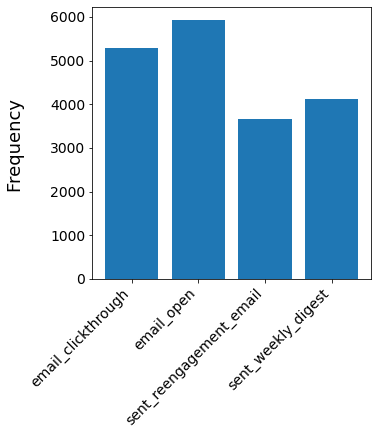

In [ ]:
df_act = df_actg.groupby('action').count()
df_act = df_act.reset_index()
fig8, ax = plt.subplots(1,1, figsize = (5,5))
a6 = ax.bar(df_act.action, height = df_act.user_id)
a6 = ax.set_xticklabels(df_act.action, 
            ha = 'right',rotation = 45,)
ax6 = ax.tick_params(labelsize = 14)
ax6 = ax.set_ylabel('Frequency \n', fontsize = 18)

#### Group further by email action and time of occurrance

In [ ]:
df_action = dfl.groupby(['action', dfv['occurred_at'].dt.week]).count()
df_action = df_action.drop('occurred_at', axis = 1).reset_index()
#df_action.head()

#### Plot email actions over time

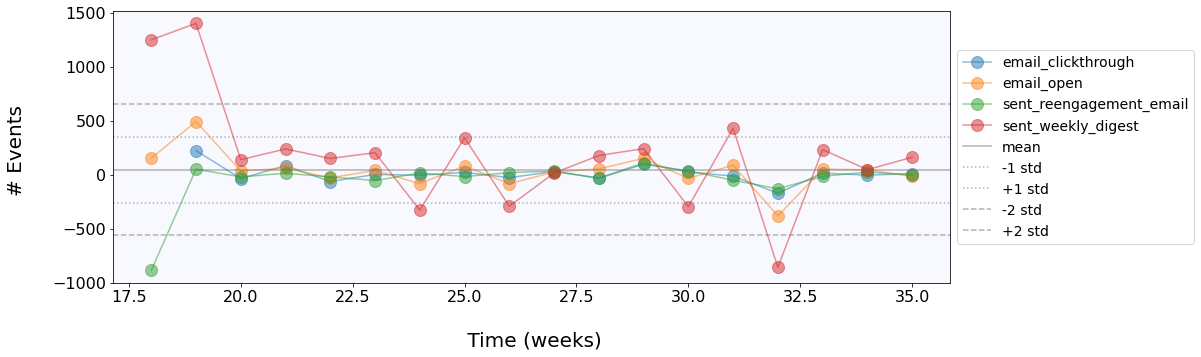

In [ ]:
df_action = subtract_baseline(df_action, 'user_id')
fig8, ax = plt.subplots(1,1, figsize = (15,5))
for l in np.unique(df_action.action):
    #if max(df_action[df_action.action == l].user_id) > 1000:
    ax.plot(df_action[df_action.action == l].occurred_at, 
            df_action[df_action.action == l].subtracted, marker = 'o', ms = 12, 
            alpha = .5, label = l)

avg = df_action.subtracted.mean()
sd = df_action.subtracted.std()
ax.axhline(avg, color = 'dimgray', ls = '-', alpha = 0.5, label = 'mean')
ax.axhline(avg - sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '-1 std')
ax.axhline(avg + sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '+1 std')
ax.axhline(avg - sd*2, color = 'dimgray', ls = 'dashed', alpha = 0.5, label = '-2 std')
ax.axhline(avg + sd*2, color = 'dimgray', ls = 'dashed', alpha = 0.5, label = '+2 std')
handles, labels = ax.get_legend_handles_labels()
ax.tick_params(labelsize = 16)
ax.set_xlabel('\n Time (weeks)', fontsize = 20)
ax.set_ylabel('# Events \n', fontsize = 20)
ax.legend(handles,labels, loc='center left', fontsize = 14, bbox_to_anchor=(1, 0.5))
ax.set_facecolor ('ghostwhite')

### _Problem: There was a decline in the number of weekly digest emails sent._
_I don't think this is causative since the weekly digest is a summary of the activity during the week. If the overall activity is down, there is a reasonable chance that there are fewer events to compile into a digest._

## Is there a user type associated with the engagement slump?

#### Get the frequency distribution of the user type

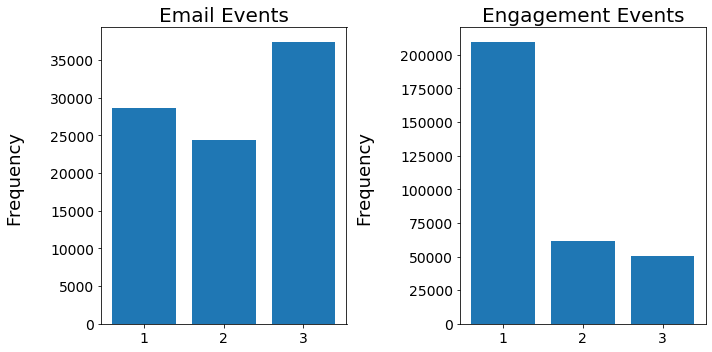

In [ ]:
df_utype = dfl.groupby('user_type').count()
df_utype = df_utype.reset_index()
df_utotal = dfv[dfv.event_type == 'engagement'].groupby('user_type').count()
df_utotal = df_utotal.reset_index()
fig8, ax = plt.subplots(1,2, figsize = (10,5))
a8 = ax[0].bar(df_utype.user_type, height = df_utype.user_id)
ax8 = ax[0].tick_params(labelsize = 14)
ax8 = ax[0].set_ylabel('Frequency \n', fontsize = 18)
ax8 = ax[0].set_title('Email Events', fontsize = 20)
a8b = ax[1].bar(df_utotal.user_type, height = df_utotal.user_id)
ax8b = ax[1].tick_params(labelsize = 14)
ax8b = ax[1].set_ylabel('Frequency \n', fontsize = 18)
ax8b = ax[1].set_title('Engagement Events', fontsize = 20)
plt.tight_layout()

#### Group email activities by user_type

In [ ]:
df_type = dfl.groupby(['user_type', dfv['occurred_at'].dt.week]).count()
df_type = df_type.drop('occurred_at', axis = 1).reset_index()
#df_type.head()

#### Plot email activity over time for each user type

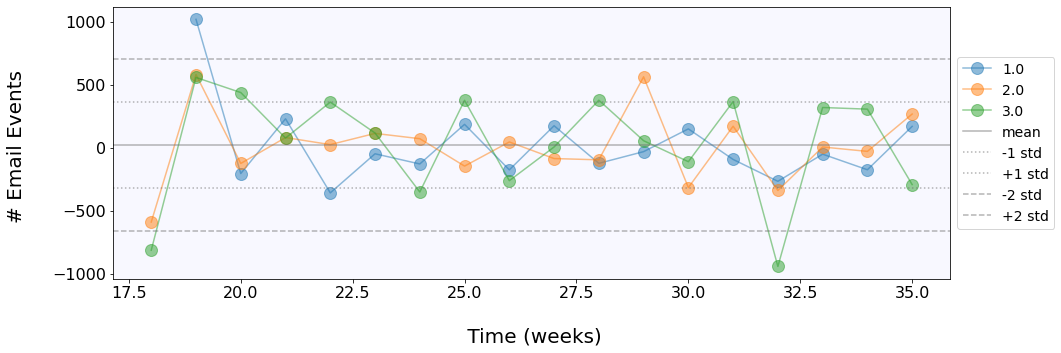

In [ ]:
df_type = subtract_baseline(df_type, 'user_id')
fig9, ax = plt.subplots(1,1, figsize = (15,5))
for l in np.unique(df_type.user_type):
    ax.plot(df_type[df_type.user_type == l].occurred_at, 
            df_type[df_type.user_type == l].subtracted, marker = 'o', ms = 12, 
            alpha = .5, label = l)
avg = df_type.subtracted.mean()
sd = df_type.subtracted.std()
format_axes(fig9, ax, '# Email Events \n')

#### Group engagment activity by user type

In [ ]:
df_etype = dfv[dfv.event_type == 'engagement'].groupby(['user_type', dfv['occurred_at'].dt.week]).count()
df_etype = df_etype.drop('occurred_at', axis = 1).reset_index()
#df_type.head()

#### Plot engagment activity over time for each user type

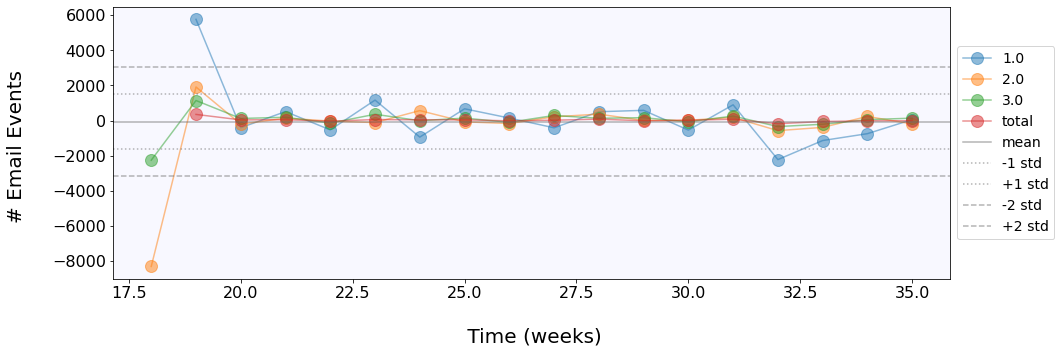

In [ ]:
df_etype = subtract_baseline(df_etype, 'user_id')
fig9, ax = plt.subplots(1,1, figsize = (15,5))
for l in np.unique(df_etype.user_type):
    ax.plot(df_etype[df_etype.user_type == l].occurred_at, 
            df_etype[df_etype.user_type == l].subtracted, marker = 'o', ms = 12, 
            alpha = .5, label = l)
ax.plot(df_total.occurred_at, df_total.subtracted, marker = 'o', ms = 12,
        alpha = .5, label = 'total')
avg = df_etype.subtracted.mean()
sd = df_etype.subtracted.std()
format_axes(fig9, ax, '# Email Events \n')

### _Problem: User type 1 a dip in engagement larger than the total or the other two user types._ 
_This suggests that type 1 users are specifically affected by the drop or are the cause of the drop. Because the total is the sum of activity for all three groups, the average is less of a drop than for user 1 alone since user types 1 and 2 are unaffected._

## Modeling plan

#### Granger Causality for predictions

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
df_etype = df_etype.reset_index()
dfc = pd.DataFrame(index = df_etype[df_etype.user_type == l].occurred_at)
df_etype = df_etype.set_index('occurred_at')
dfc['type1'] = df_etype[df_etype.user_type == l].subtracted
#df_total = df_total.reset_index()
df_total = df_total.set_index(df_total.occurred_at)
dfc['total'] = df_total.subtracted
dfc.head()

,type1,total
occurred_at,,
18,-2254.0,NaN
19,1144.0,353.0
20,121.0,40.0
21,190.0,53.0
22,-140.0,-34.0


#### Make Test and Training Sets

In [ ]:
split = ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 17)
for train_index, test_index in split.split(dfc):
    shuff_train = dfc.iloc[train_index][:]
    shuff_test = dfc.iloc[test_index][:]

In [ ]:
y_train = shuff_train.total.fillna(0)
X_train = shuff_train.drop('total', axis = 1).fillna(0)
y_test = shuff_test.total.fillna(0)
X_test = shuff_test.drop('total', axis = 1).fillna(0)

#### Vector Autoregressive Model

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
#mod = VAR(shuff_train.values)
#res = mod.fit(maxlags=6)
#pred = res.forecast(y=X_train, steps=5) # steps = next observations
#pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
#print(pred)

### Look for relationships between variables - Dynamic Time Warping
#### Total engagement and user type

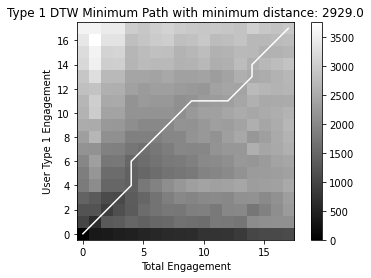

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = df_total.subtracted.fillna(0).interpolate().values
d2 = df_type[df_type.user_type == 1].subtracted.fillna(0).interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Total Engagement')
plt.ylabel('User Type 1 Engagement')
plt.title(f'Type 1 DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.colorbar()

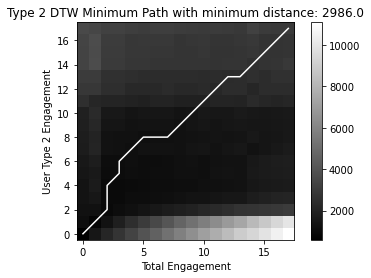

In [ ]:
d1 = df_total.subtracted.fillna(0).interpolate().values
d2 = df_type[df_type.user_type == 2].subtracted.fillna(0).interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Total Engagement')
plt.ylabel('User Type 2 Engagement')
plt.title(f'Type 2 DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.colorbar()

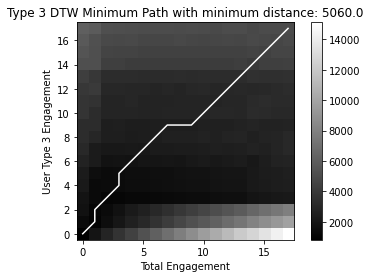

In [ ]:
d1 = df_total.subtracted.fillna(0).interpolate().values
d2 = df_type[df_type.user_type == 3].subtracted.fillna(0).interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Total Engagement')
plt.ylabel('User Type 3 Engagement')
plt.title(f'Type 3 DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.colorbar()

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

x = d1
y = d2
distance, path = fastdtw(x, y, dist=euclidean)

#print(distance)
#print(path)

### Quick prediction with a linear model (less effective)

#### Total engagement linear model

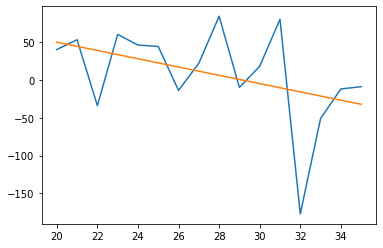

In [ ]:
from sklearn.linear_model import LinearRegression

# fit linear model for total engagement
X = [i for i in range(0, len(df_total.occurred_at[2:]))]
X = np.reshape(X, (len(X), 1))
y_total = df_total.subtracted[2:]
total_model = LinearRegression()
total_fit = total_model.fit(X, y_total)
total_trend = total_model.predict(X)
plt.plot(df_total.occurred_at[2:],y_total)
plt.plot(df_total.occurred_at[2:],total_trend)

#### Linear model for type 1 user engagement

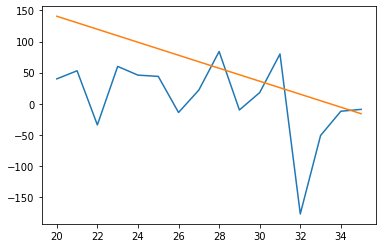

In [ ]:
# fit linear model for user_type1
X = [i for i in range(0, len(df_total.occurred_at[2:]))]
X = np.reshape(X, (len(X), 1))
y_type1 = dfc.type1[2:]
type1_model = LinearRegression()
type1_fit = type1_model.fit(X, y_type1)
type1_trend = type1_model.predict(X)

# plot predictions vs actual
fig, ax = plt.subplots(1,1)
ax.plot(y_total)
plt.plot(df_total.occurred_at[2:],type1_trend)


#### Grainger Causality test (in progress)

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=5
test = 'ssr-chi2test'
verbose = True
variables = [c for c in dfv.columns.values if c n
#dfv = dfv.drop('user_type', axis = 1)
def grangers_causality_matrix(X_train, variables, test, verbose):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset

df_grainger = grangers_causality_matrix(dfv, variables, test, verbose)
sns.heatmap(df_grainger)

Y = user_id, X = user_id, P Values = [1.0, 1.0, 1.0, 1.0, 1.0]


TypeError: float() argument must be a string or a number, not 'Timestamp'

### Results and Recommended Solutions

There are two potential problems that may or may not be related. 

1) There is a hold-up in the account activation process likely due to the transition to Yammer Enterprise. 

2) User Type 1 is specifically affected by this drop, but I have no information on the definition of the user type classification criterion. 

The attempts I made at determining the criteria for user classification have ruled out location, device type, language, date of creation, and date of activation. I would consult with my team for further informatio on user type to determine if this is a causative or correlative relationship. 

Interestingly, the number of re-engagement emails sent did not increase as a result of the sudden drop in engagement in August. This could mean the drop was not severe enough to trigger preventive action to retain user engagement or that the threshold for preventative action needs to be lowered for correction of future drops.